# Titanic: starter ML competition

## To do / ideas
To do:
* Make reusable functions for the submission process and data/feature engineering so it can be used on the training set and the test set
* Try tuning the DecisionTreeClassifier
* Other Tree models (RandomForrestClassifier?)
* LogisticRegression?
* Engineer some features (Families by surname? Certain cabins?)

## Setup

In [75]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

print(train_df)
print(train_df.info())
print(test_df)
print(test_df.info())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

## Explore columns for missing/unusual data

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
allowed_vals = {'Survived': [0, 1]}

train_df['Parch'].value_counts(dropna=False)
print(train_df['Embarked'].value_counts(dropna=False))


print(train_df[train_df['Embarked'].isnull()])

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [28]:
print(train_df[train_df['Ticket'].duplicated()])

     PassengerId  Survived  Pclass  \
24            25         0       3   
71            72         0       3   
88            89         1       1   
117          118         0       2   
119          120         0       3   
..           ...       ...     ...   
876          877         0       3   
879          880         1       1   
880          881         1       2   
885          886         0       3   
888          889         0       3   

                                              Name     Sex   Age  SibSp  \
24                   Palsson, Miss. Torborg Danira  female   8.0      3   
71                      Goodwin, Miss. Lillian Amy  female  16.0      5   
88                      Fortune, Miss. Mabel Helen  female  23.0      3   
117                Turpin, Mr. William John Robert    male  29.0      1   
119              Andersson, Miss. Ellis Anna Maria  female   2.0      4   
..                                             ...     ...   ...    ...   
876               

## Basic modelling
Just using some simple features to train a tree based model

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [65]:
#['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
# 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
#features = ['Pclass', 'Sex']
features = ['Pclass', 'Sex', 'Fare']

X = train_df[features]
y = train_df['Survived']

X = pd.get_dummies(X, columns=['Pclass', 'Sex'], drop_first=True, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=173, 
                                                    shuffle=True, stratify=y)

In [67]:
## Model construction

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

#y_pred = pd.Series(model.predict(X_test),index=y_test)
    

Accuracy: 0.8208955223880597


In [61]:
# What about logistic regression models?

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_probs = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

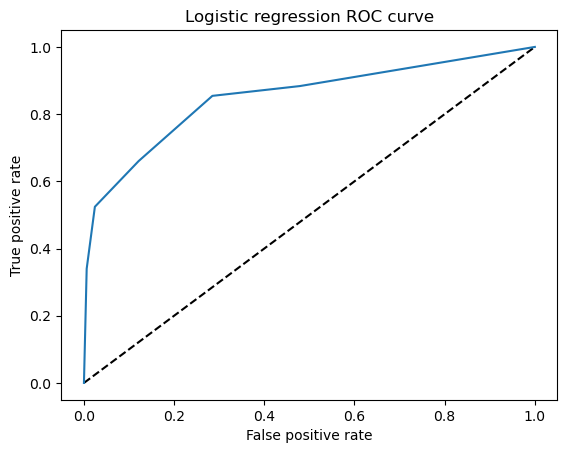

In [63]:
import matplotlib.pyplot as plt
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic regression ROC curve")
plt.show()

## Generate output

In [ ]:
#######################################
## Adjust these variables first!
final_model = model
file_name = "DTClassifier_1"
#######################################

In [ ]:
## This cell for producing output
X_final = test_df[features].fillna({'Fare':0.0})
X_final = pd.get_dummies(X_final, columns=['Pclass', 'Sex'], drop_first=True, dtype=int)

test_preds = pd.Series(final_model.predict(X_final), index=test_df['PassengerId'])
print(test_preds)
test_preds.to_csv("./output/" + file_name + ".csv", index_label="PassengerID", header=["Survived"])

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Length: 418, dtype: int64
